# TinyViT

- 22k classes
- highres support

variants: {5,11,21}m_{1,22}k_{224,384,512}

In [1]:
# ignore UserWarning: Overwriting tiny_vit_5m_224 in registry with models.tiny_vit.tiny_vit_5m_224
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="libs.tiny_vit.tiny_vit")

from PIL import Image

from libs.common import get_random_image, imshow
from libs.tiny_vit.tiny_vit_inference import TinyViTInference


# get a random image from the validation set
image_path = get_random_image('dataset/test/ants')
img = Image.open(image_path)

## Pretrained Model

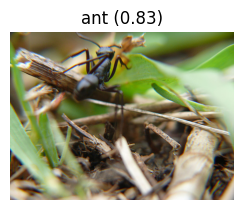

In [2]:
classifier_pretrained = TinyViTInference(variant="21m_22k_384", device="cuda")

# prediction
scores_np, inds_np = classifier_pretrained.predict(img, topk=5, print_results=False)

# [0] classnames might contain more than one string
predicted_label = classifier_pretrained.classnames[str(inds_np[0])][0]
probability = scores_np[0]

imshow(img, title=f'{predicted_label} ({probability:.2f})')

## Finetuned Model

finetuned classes: ['ants', 'bees', 'cats', 'dogs', 'none']


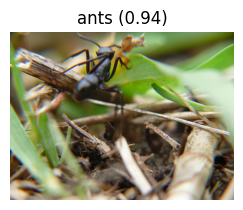

In [3]:
# Load finetuned model using metadata file
classifier_finetuned = TinyViTInference(metadata_path="output/tinyvit_21m_384_finetuned_metadata.json", device="cuda")

print(f"finetuned classes: {[labels[0] for labels in classifier_finetuned.classnames.values()]}")

# prediction
scores_np_ft, inds_np_ft = classifier_finetuned.predict(img, topk=3, print_results=False)

# [0] classnames might contain more than one string
predicted_label = classifier_finetuned.classnames[str(inds_np_ft[0])][0]
probability = scores_np_ft[0]

imshow(img, title=f'{predicted_label} ({probability:.2f})')